<a href="https://colab.research.google.com/github/Uzayisenga/4/blob/master/pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
from sklearn.model_selection import train_test_split


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('./data.csv')

In [53]:
df.head()

,REF_DATE,GEO,DGUID,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998.0,Ghana,NaN,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223.0,units,0.0,v4384837,1.1.1.1,41588.0,NaN,NaN,NaN,0.0
1,1998.0,Ghana,NaN,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384838,1.1.1.2,41.7,NaN,NaN,NaN,1.0
2,1998.0,Ghana,NaN,15 to 19 years,Live births,Number of events,Number,223.0,units,0.0,v4384839,1.1.2.1,19721.0,NaN,NaN,NaN,0.0
3,1998.0,Ghana,NaN,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384840,1.1.2.2,19.8,NaN,NaN,NaN,1.0
4,1998.0,Ghana,NaN,15 to 19 years,Induced abortions,Number of events,Number,223.0,units,0.0,v4384841,1.1.3.1,20859.0,NaN,NaN,NaN,0.0


In [54]:

df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Age group', 'Teen pregnancy outcomes',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [55]:
df.drop('DGUID',axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 960 non-null    float64
 1   GEO                      960 non-null    object 
 2   Age group                960 non-null    object 
 3   Teen pregnancy outcomes  960 non-null    object 
 4   Characteristics          960 non-null    object 
 5   UOM                      960 non-null    object 
 6   UOM_ID                   960 non-null    float64
 7   SCALAR_FACTOR            960 non-null    object 
 8   SCALAR_ID                960 non-null    float64
 9   VECTOR                   960 non-null    object 
 10  COORDINATE               960 non-null    object 
 11  VALUE                    960 non-null    float64
 12  STATUS                   0 non-null      float64
 13  SYMBOL                   3 non-null      object 
 14  TERMINATED               4

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 960 non-null    float64
 1   GEO                      960 non-null    object 
 2   Age group                960 non-null    object 
 3   Teen pregnancy outcomes  960 non-null    object 
 4   Characteristics          960 non-null    object 
 5   UOM                      960 non-null    object 
 6   UOM_ID                   960 non-null    float64
 7   SCALAR_FACTOR            960 non-null    object 
 8   SCALAR_ID                960 non-null    float64
 9   VECTOR                   960 non-null    object 
 10  COORDINATE               960 non-null    object 
 11  VALUE                    960 non-null    float64
 12  STATUS                   0 non-null      float64
 13  SYMBOL                   3 non-null      object 
 14  TERMINATED               4

In [58]:
df.isnull().sum()

REF_DATE                     9
GEO                          9
Age group                    9
Teen pregnancy outcomes      9
Characteristics              9
UOM                          9
UOM_ID                       9
SCALAR_FACTOR                9
SCALAR_ID                    9
VECTOR                       9
COORDINATE                   9
VALUE                        9
STATUS                     969
SYMBOL                     966
TERMINATED                 921
DECIMALS                     9
dtype: int64

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
REF_DATE,960.0,1999.025000,0.821631,1998.0,1998.0,1999.00,2000.00,2000.0
UOM_ID,960.0,244.500000,21.511207,223.0,223.0,244.50,266.00,266.0
SCALAR_ID,960.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.0
VALUE,960.0,1018.092188,3596.042522,0.0,13.7,39.85,271.75,41588.0
STATUS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECIMALS,960.0,0.500000,0.500261,0.0,0.0,0.50,1.00,1.0


In [60]:
df.shape

(969, 16)

In [61]:
df.columns

Index(['REF_DATE', 'GEO', 'Age group', 'Teen pregnancy outcomes',
       'Characteristics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID',
       'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED',
       'DECIMALS'],
      dtype='object')

In [62]:
pd.DataFrame((100*df.isnull().sum()/len(df)).sort_values(ascending=False),columns=['Null %'])

,Null %
STATUS,100.000000
SYMBOL,99.690402
TERMINATED,95.046440
REF_DATE,0.928793
GEO,0.928793
Age group,0.928793
Teen pregnancy outcomes,0.928793
Characteristics,0.928793
UOM,0.928793
UOM_ID,0.928793


In [63]:
df.drop(['STATUS','SYMBOL','TERMINATED'],axis=1,inplace=True)



df.head()

,REF_DATE,GEO,Age group,Teen pregnancy outcomes,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1998.0,Ghana,15 to 19 years,"Total, teen pregnancies",Number of events,Number,223.0,units,0.0,v4384837,1.1.1.1,41588.0,0.0
1,1998.0,Ghana,15 to 19 years,"Total, teen pregnancies","Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384838,1.1.1.2,41.7,1.0
2,1998.0,Ghana,15 to 19 years,Live births,Number of events,Number,223.0,units,0.0,v4384839,1.1.2.1,19721.0,0.0
3,1998.0,Ghana,15 to 19 years,Live births,"Rate per 1,000 females","Rates per 1,000 females",266.0,units,0.0,v4384840,1.1.2.2,19.8,1.0
4,1998.0,Ghana,15 to 19 years,Induced abortions,Number of events,Number,223.0,units,0.0,v4384841,1.1.3.1,20859.0,0.0


In [64]:
# sns.set_style('darkgrid')
# sns.set_palette('summer_r')

Text(0, 0.5, 'Teen pregnancy outcomes')

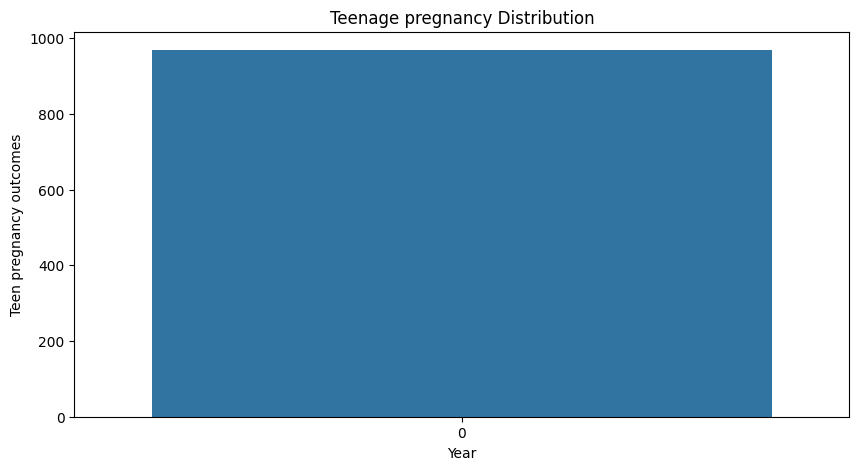

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(df['REF_DATE'])
plt.title('Teenage pregnancy Distribution')
plt.xlabel('Year')
plt.ylabel('Teen pregnancy outcomes')



Text(0.5, 1.0, 'Pie chart of Data Geography  Distribution')

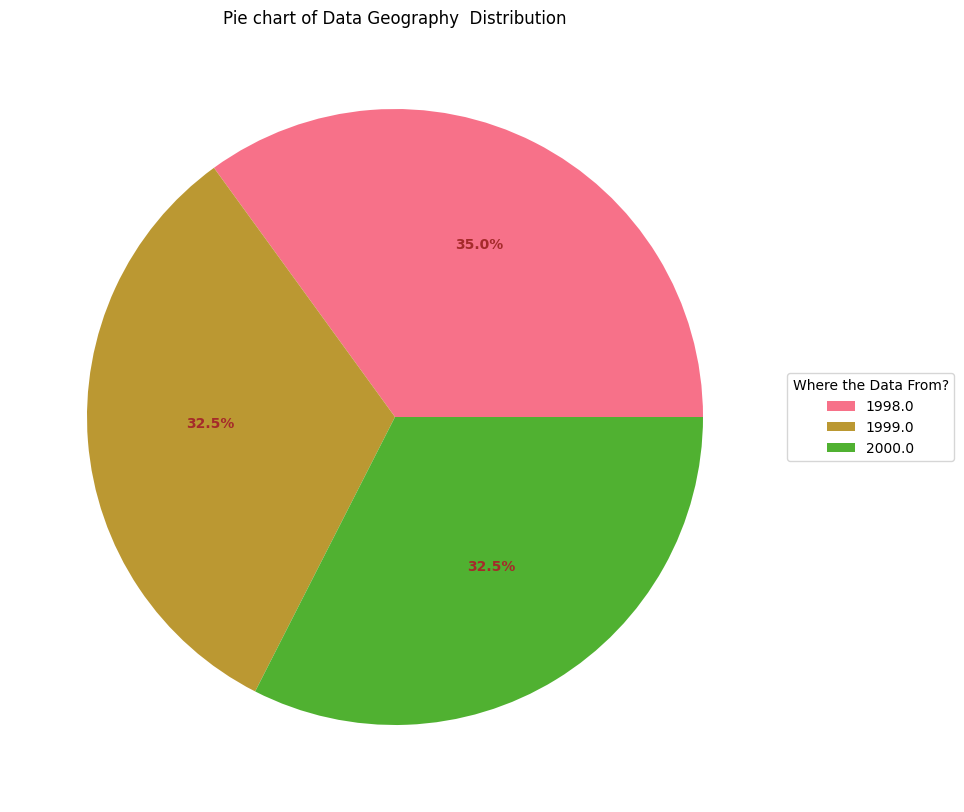

In [66]:
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(20,10), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct)


wedges, texts, autotexts = ax.pie(df['REF_DATE'].value_counts(), autopct=lambda pct: func(pct, df['REF_DATE'].value_counts()),
                                 )

ax.legend(wedges, df['REF_DATE'].unique(),
          title="Where the Data From?",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold",c='brown')

ax.set_title("Pie chart of Data Geography  Distribution")

Text(0.5, 1.0, 'Pie chart of Data Geography  Distribution')

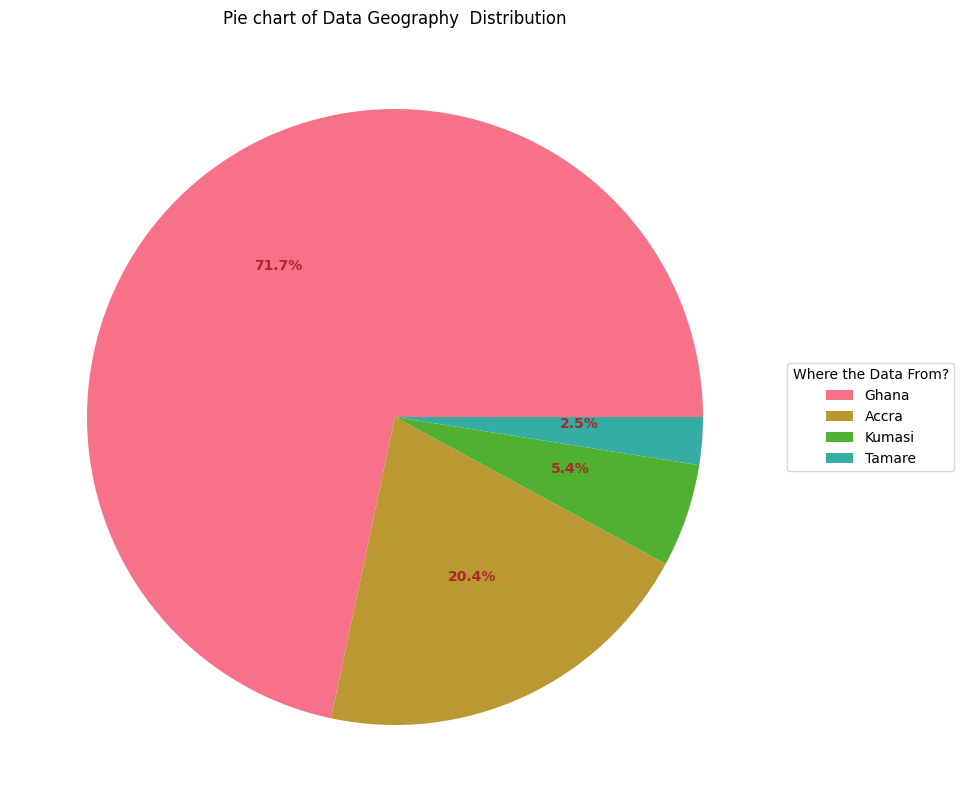

In [67]:

sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(20,10), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct)


wedges, texts, autotexts = ax.pie(df['GEO'].value_counts(), autopct=lambda pct: func(pct, df['GEO'].value_counts()),
                                 )

ax.legend(wedges, df['GEO'].unique(),
          title="Where the Data From?",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold",c='brown')

ax.set_title("Pie chart of Data Geography  Distribution")

Text(0.5, 1.0, 'Year Interval Chart')

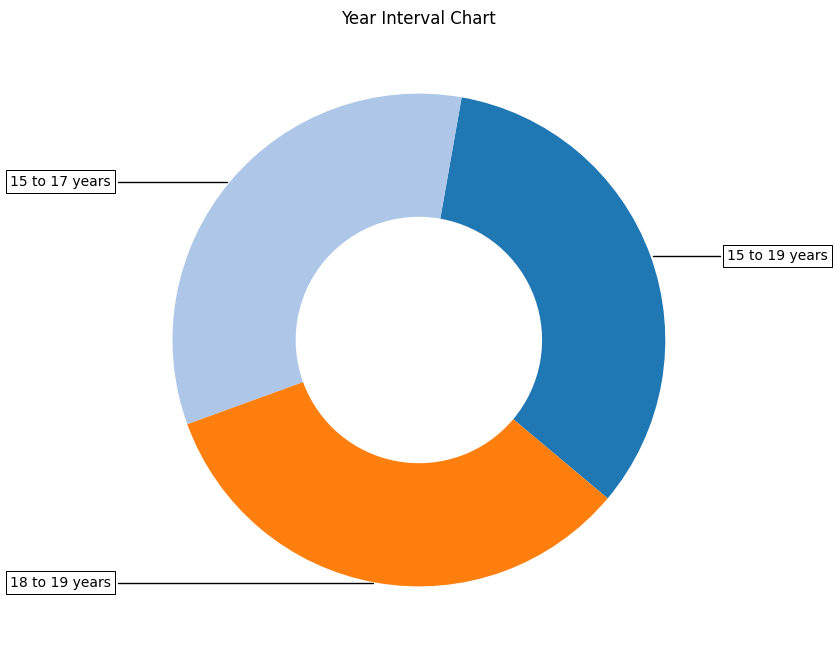

In [68]:
sns.set_palette('tab20')
fig, ax = plt.subplots(figsize=(16, 8), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(df['Age group'].value_counts(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

lbls = df['Age group'].unique()
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(lbls[i], xy=(x, y), xytext=(1.25*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Year Interval Chart")

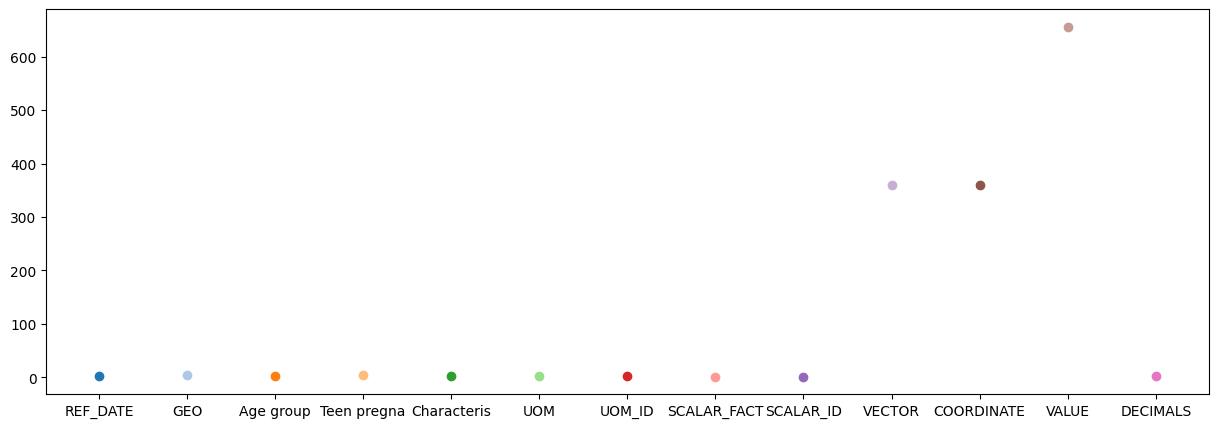

In [69]:
plt.figure(figsize=(15,5))
for ind,col in enumerate(df.columns):
    plt.scatter(df.columns[ind][:11],df[col].nunique())

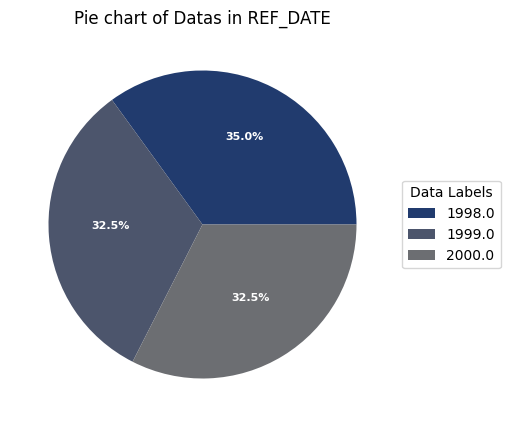

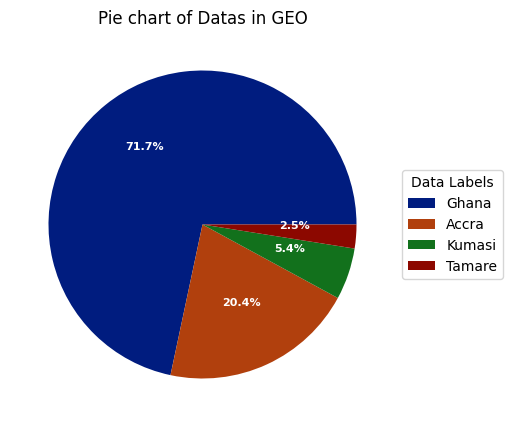

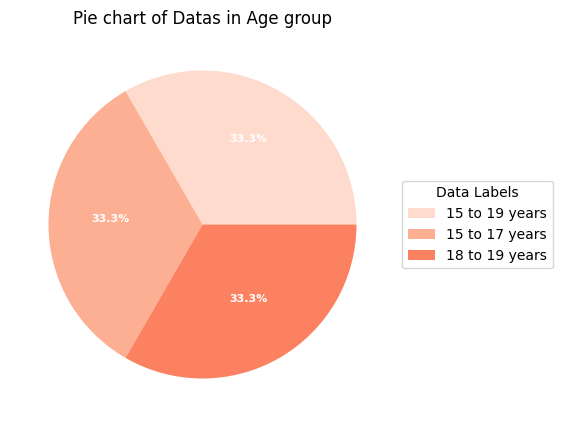

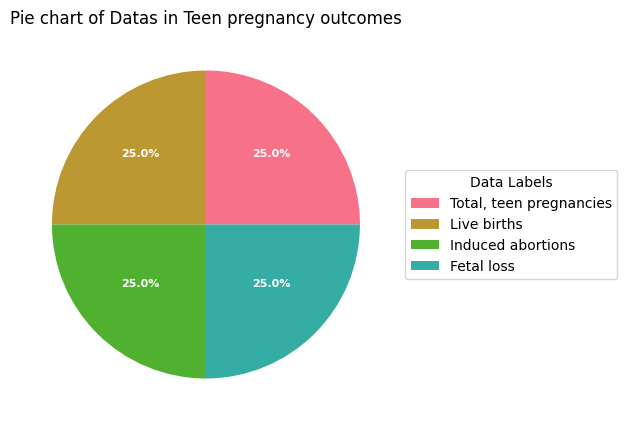

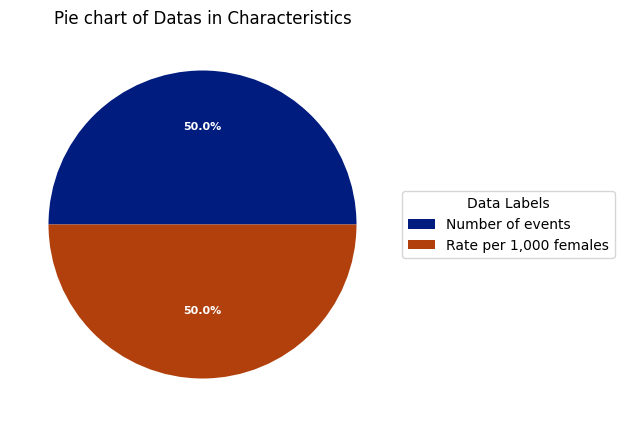

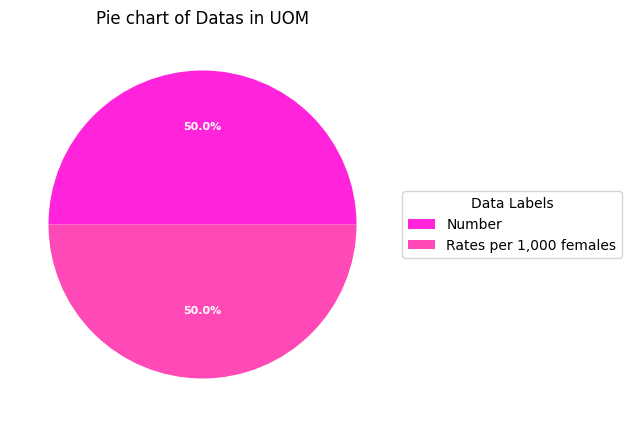

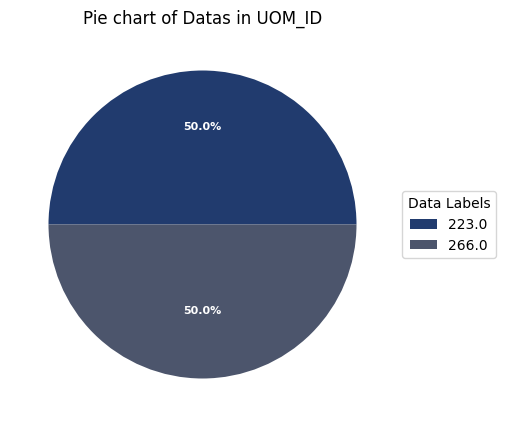

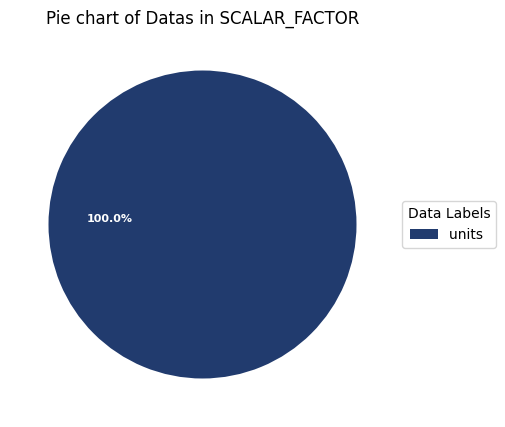

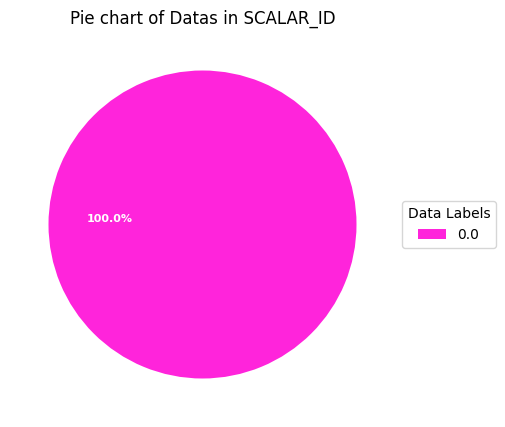

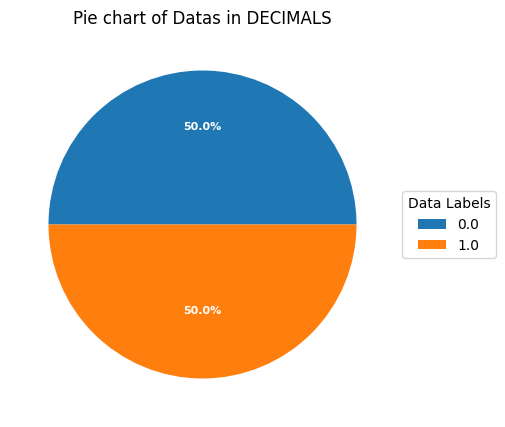

In [70]:
import random
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct)

for  indx,col in enumerate(df.columns):
    if df[col].nunique() < 25:
        sns.set_palette(random.choice(['husl','coolwarm','tab10','pastel','dark','twilight','cividis','spring','Reds','flare']))
        fig, ax = plt.subplots(figsize=(10,5), subplot_kw=dict(aspect="equal"))
        wedges, texts, autotexts = ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct, df[col].value_counts()),
                                  textprops=dict(color="w"))

        ax.legend(wedges, df[col].unique(),
        title="Data Labels",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1))

        plt.setp(autotexts, size=8, weight="bold")

        ax.set_title(f"Pie chart of Datas in {df.columns[indx]}")

In [71]:
df.drop(['SCALAR_FACTOR','SCALAR_ID'],axis=1,inplace=True)

In [72]:
df = pd.concat([df,pd.get_dummies(df[['UOM','UOM_ID','Characteristics','Age group']],drop_first=True)],axis=1).drop(['UOM','UOM_ID','Characteristics','Age group'],axis=1)
df.head()

,REF_DATE,GEO,Teen pregnancy outcomes,VECTOR,COORDINATE,VALUE,DECIMALS,"UOM_Rates per 1,000 females","Characteristics_Rate per 1,000 females",Age group_15 to 19 years,Age group_18 to 19 years
0,1998.0,Ghana,"Total, teen pregnancies",v4384837,1.1.1.1,41588.0,0.0,0,0,1,0
1,1998.0,Ghana,"Total, teen pregnancies",v4384838,1.1.1.2,41.7,1.0,1,1,1,0
2,1998.0,Ghana,Live births,v4384839,1.1.2.1,19721.0,0.0,0,0,1,0
3,1998.0,Ghana,Live births,v4384840,1.1.2.2,19.8,1.0,1,1,1,0
4,1998.0,Ghana,Induced abortions,v4384841,1.1.3.1,20859.0,0.0,0,0,1,0


In [73]:
df['Teen pregnancy outcomes'] = df['Teen pregnancy outcomes'].rank(method='dense')
df['GEO'] = df['GEO'].rank(method='dense')
df['REF_DATE'] = df['REF_DATE'].rank(method='dense')
df.head()

,REF_DATE,GEO,Teen pregnancy outcomes,VECTOR,COORDINATE,VALUE,DECIMALS,"UOM_Rates per 1,000 females","Characteristics_Rate per 1,000 females",Age group_15 to 19 years,Age group_18 to 19 years
0,1.0,2.0,4.0,v4384837,1.1.1.1,41588.0,0.0,0,0,1,0
1,1.0,2.0,4.0,v4384838,1.1.1.2,41.7,1.0,1,1,1,0
2,1.0,2.0,3.0,v4384839,1.1.2.1,19721.0,0.0,0,0,1,0
3,1.0,2.0,3.0,v4384840,1.1.2.2,19.8,1.0,1,1,1,0
4,1.0,2.0,2.0,v4384841,1.1.3.1,20859.0,0.0,0,0,1,0


<ipython-input-74-6540ddcc050f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='flare')


<Axes: >

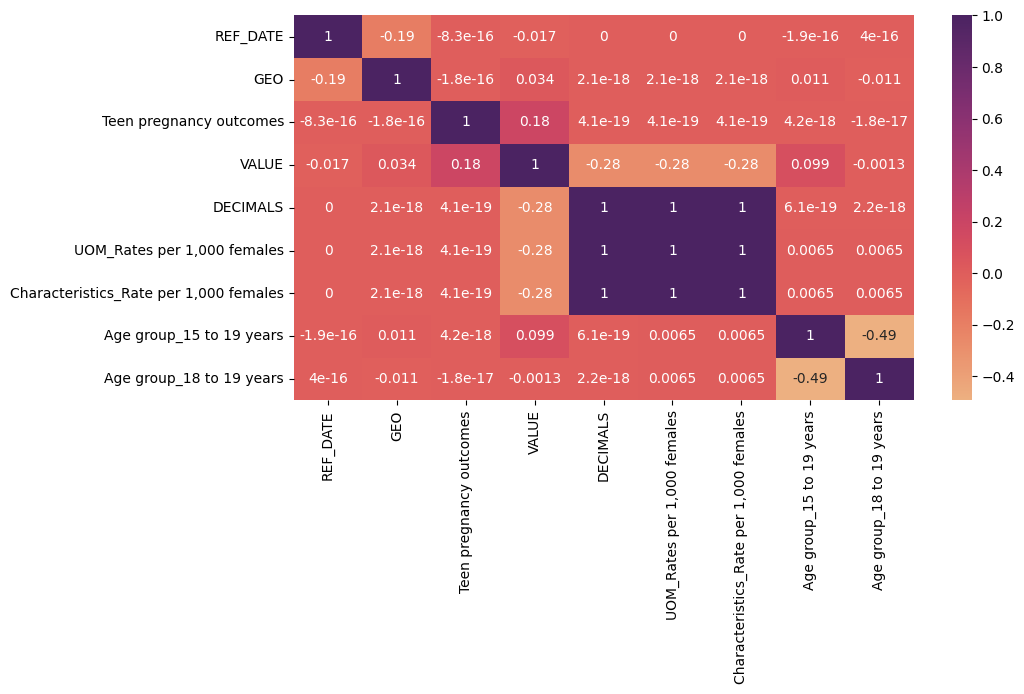

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='flare')

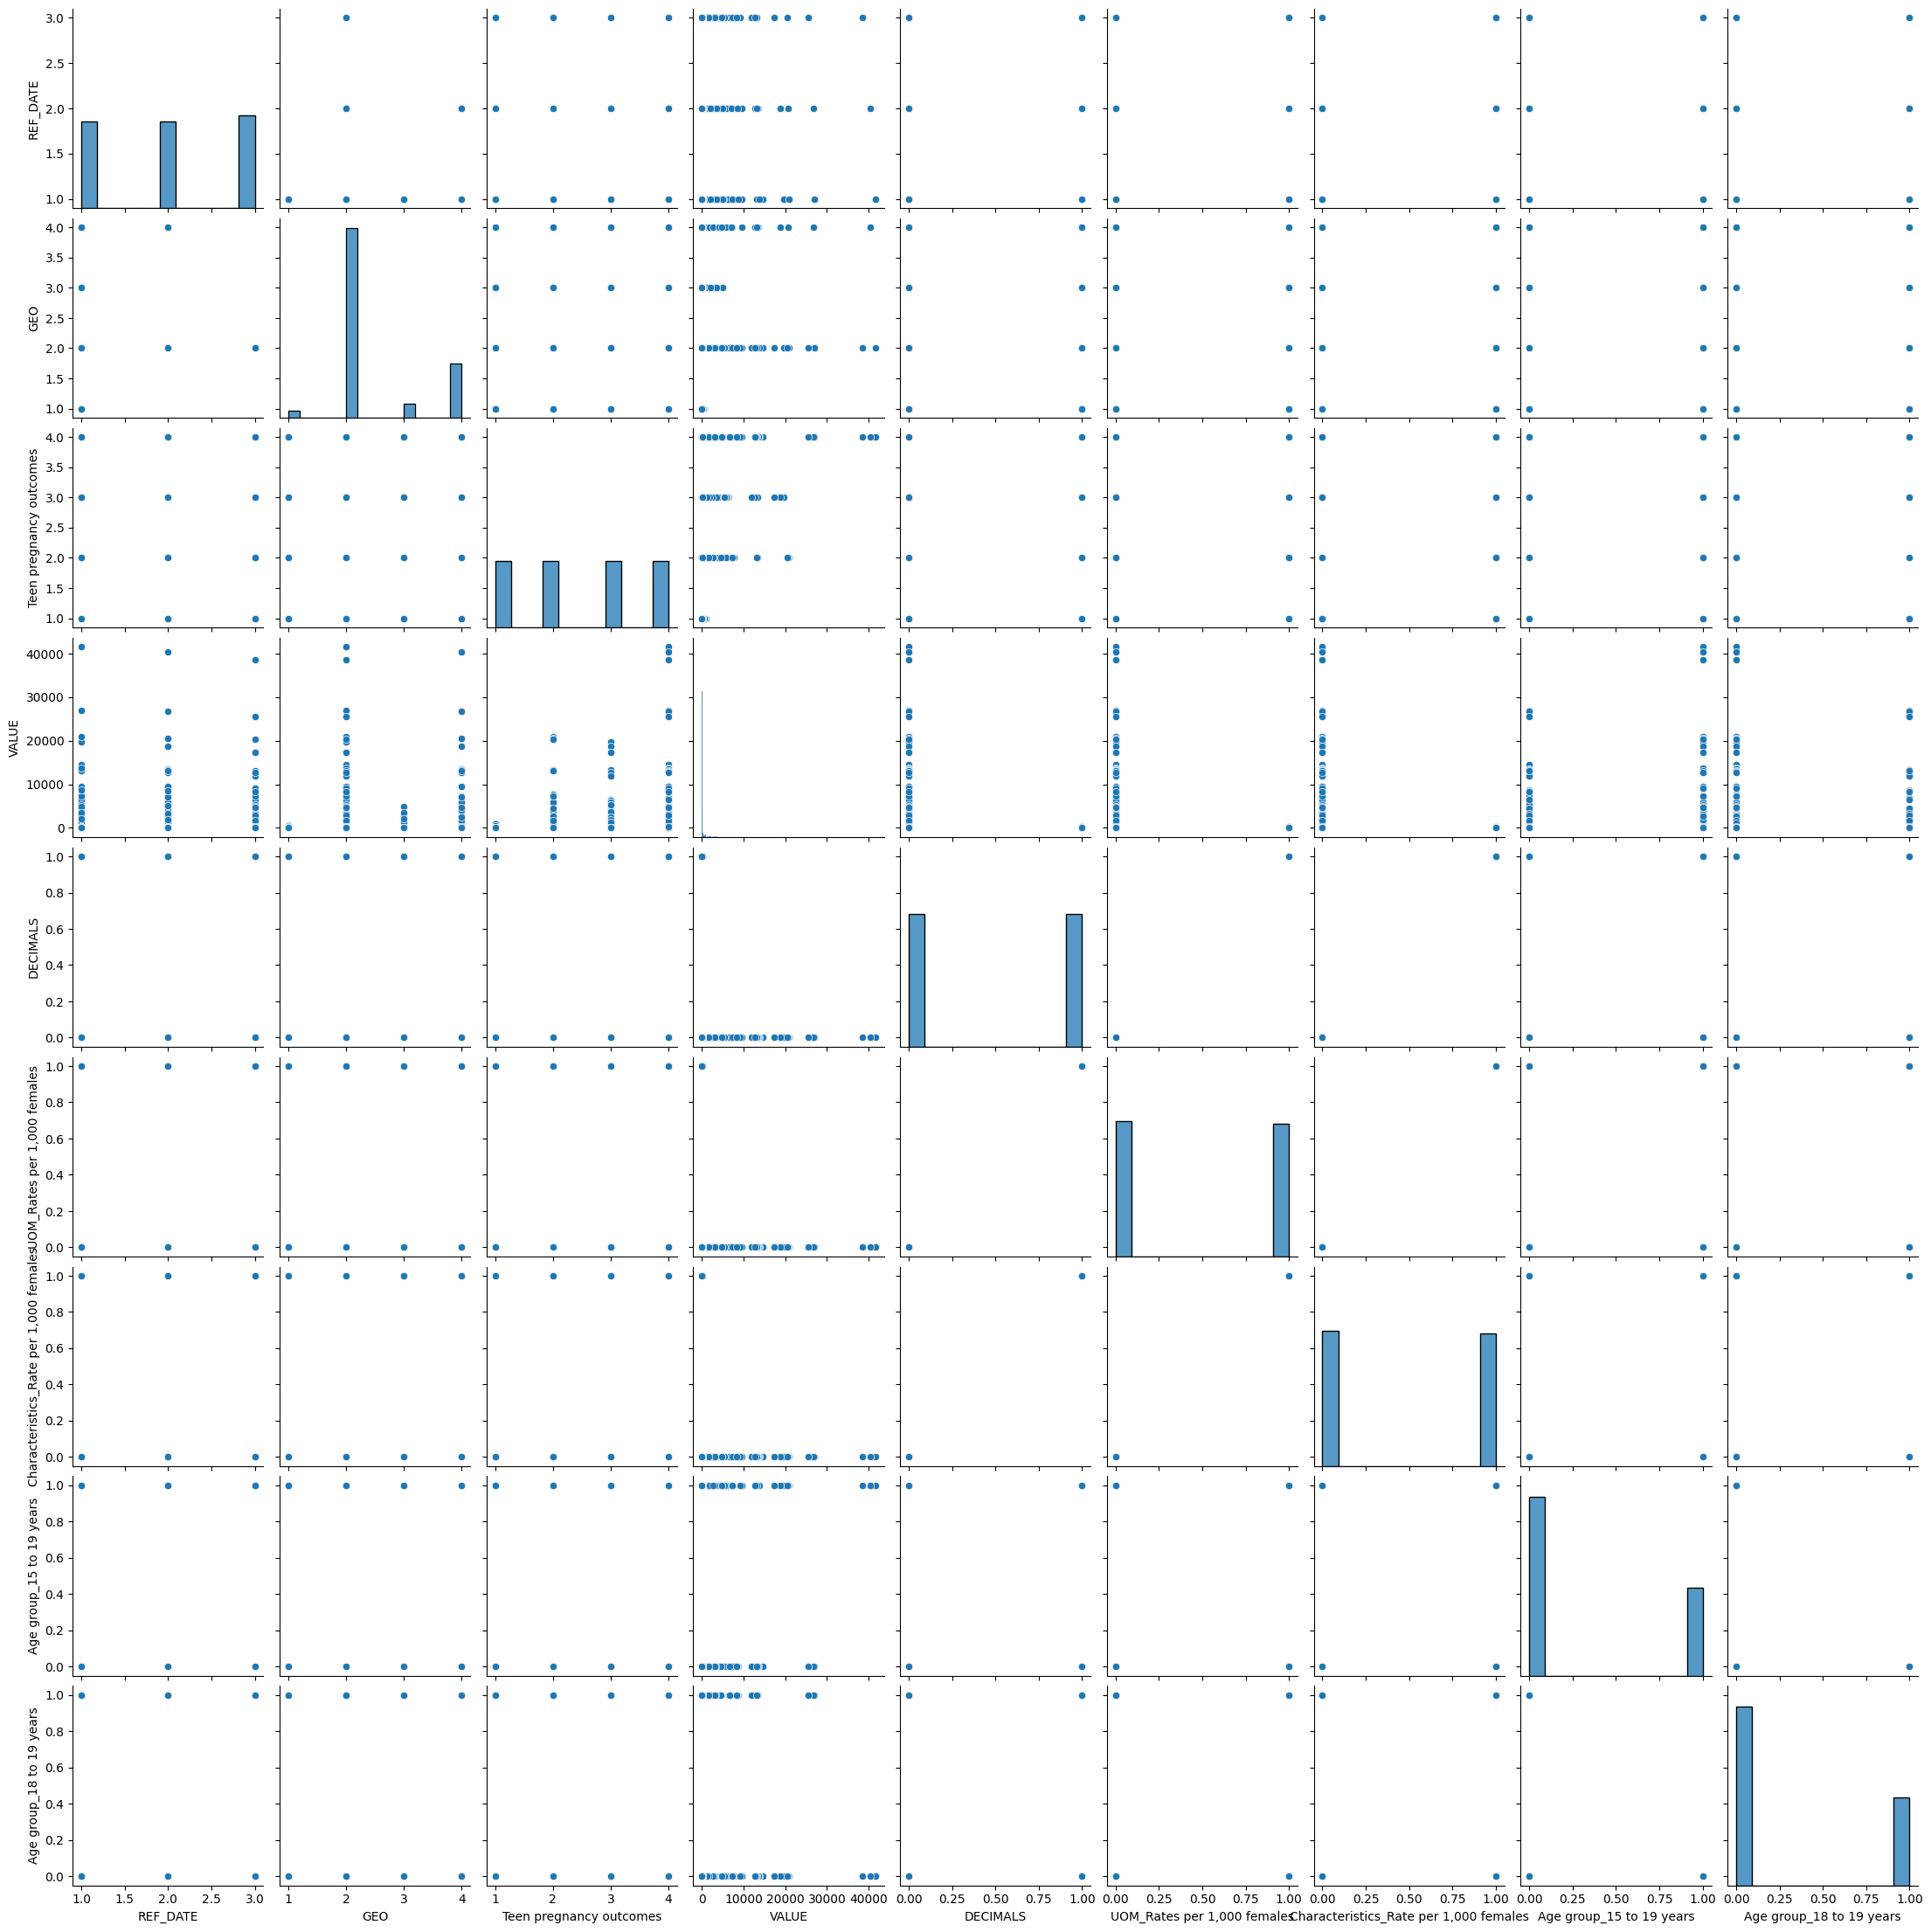

In [75]:
sns.pairplot(df)

In [76]:
x = df[['Age group_15 to 19 years', 'Characteristics_Rate per 1,000 females', 'GEO', 'Teen pregnancy outcomes']]

In [77]:

y=df.iloc[:,-2]

In [78]:
y

0      1
1      1
2      1
3      1
4      1
      ..
964    0
965    0
966    0
967    0
968    0
Name: Age group_15 to 19 years, Length: 969, dtype: uint8

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [81]:
xtrain = xtrain.dropna()
ytrain = ytrain.loc[xtrain.index]

In [82]:
model=DecisionTreeClassifier()


model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [83]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Replace NaNs with mean values
xtrain = imputer.fit_transform(xtrain)

In [84]:
xtest = imputer.fit_transform(xtest)

In [85]:
model.score(xtest,ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0

<Axes: ylabel='count'>

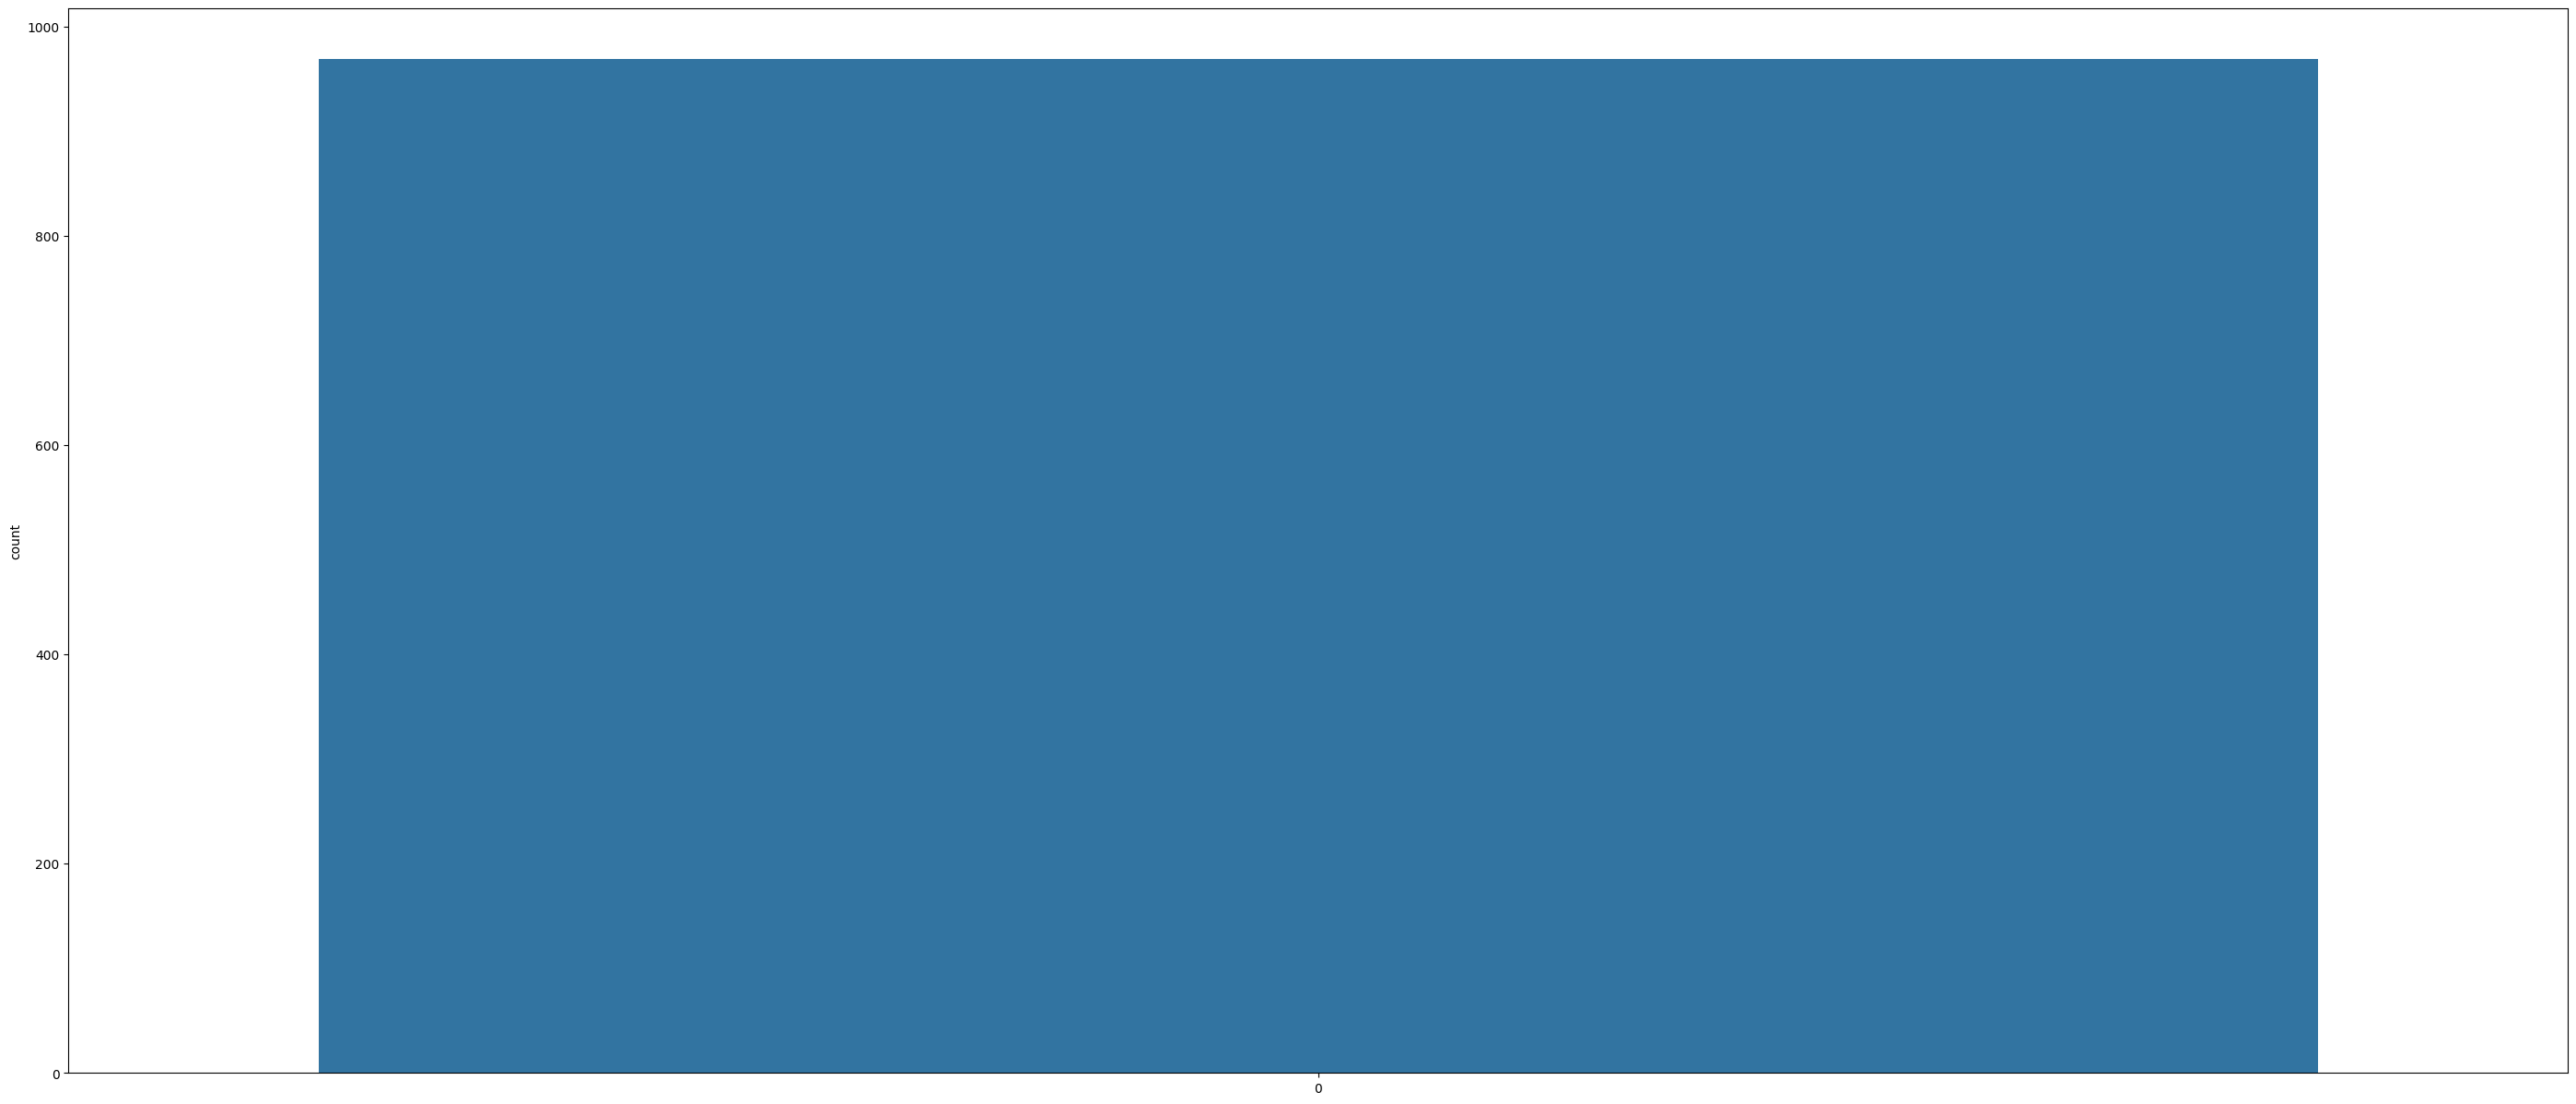

In [86]:
plt.figure(figsize=(35,15))
sns.countplot(df['GEO'])

In [87]:
#Generic function for making a classification model and accessing the performance.
# From AnalyticsVidhya tutorial
from sklearn.model_selection import ShuffleSplit

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])

  #Make predictions on training set:
  predictions = model.predict(data[predictors])

  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])

    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]

    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)

    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [89]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Separate predictor variables and outcome variable
X = traindf.drop(columns=[outcome_var])
y = traindf[outcome_var]

# Impute missing values in numerical columns using the mean strategy
numeric_features = X.select_dtypes(include='number').columns
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_features] = imputer_numeric.fit_transform(X[numeric_features])

# Impute missing values in categorical columns using the most frequent strategy
categorical_features = X.select_dtypes(include='object').columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_features] = imputer_categorical.fit_transform(X[categorical_features])

# Create and train the Logistic Regression model
model = LogisticRegression()
#model.fit(X, y=v4385013)

In [107]:
print(traindf.isnull().sum())

REF_DATE                                  5
GEO                                       5
Teen pregnancy outcomes                   5
VECTOR                                    5
COORDINATE                                5
VALUE                                     5
DECIMALS                                  5
UOM_Rates per 1,000 females               0
Characteristics_Rate per 1,000 females    0
Age group_15 to 19 years                  0
Age group_18 to 19 years                  0
dtype: int64


In [109]:
traindf = traindf.dropna()

In [110]:
from sklearn.linear_model import LogisticRegression

# Separate predictor variables and outcome variable
X = traindf[predictor_var]
y = traindf[outcome_var]

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [111]:
predictor_var = ['Age group_15 to 19 years', 'Characteristics_Rate per 1,000 females', 'GEO', 'Teen pregnancy outcomes']
outcome_var='GEO'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)


Accuracy : 99.851%
Cross-Validation Score : 99.259%
Cross-Validation Score : 98.519%
Cross-Validation Score : 97.778%
Cross-Validation Score : 97.587%
Cross-Validation Score : 97.920%


In [113]:
#Use the mean_radius:
#Predictor
predictor_var = ['GEO']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%
Cross-Validation Score : 98.889%
Cross-Validation Score : 98.025%
Cross-Validation Score : 97.772%
Cross-Validation Score : 98.218%


In [117]:
pd.DataFrame({
    "foo": ["bar"],
    "model": [RandomForestClassifier()],
})

,foo,model
0,bar,RandomForestClassifier()
